# Notebook to generate 3D structures from smiles

In [1]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
import pandas as pd
from utils.compound_preprocessing import generate_mol_3D

RDKit WARNING: [09:22:31] Enabling RDKit 2019.09.3 jupyter extensions


## Read input data

,Name,Smiles,Mol
0,Saquinavir,CC(C)(C)NC(=O)[C@@H]1C[C@@H]2CCCC[C@@H]2CN1C[C...,
1,Lopinavir,CC1=C(C(=CC=C1)C)OCC(=O)N[C@@H](CC2=CC=CC=C2)[...,
2,Tipranavir,CCC[C@]1(CC(=C(C(=O)O1)[C@H](CC)C2=CC(=CC=C2)N...,
3,Darunavir,CC(C)CN(C[C@H]([C@H](CC1=CC=CC=C1)NC(=O)O[C@H]...,
4,Amprenavir,CC(C)CN(C[C@H]([C@H](CC1=CC=CC=C1)NC(=O)O[C@H]...,

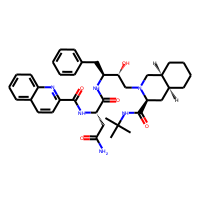
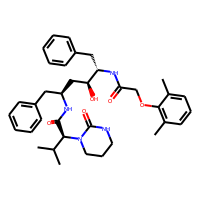
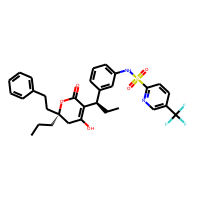
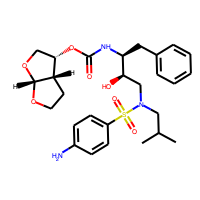
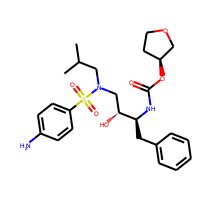

In [2]:
fname='proteaseFDAdrugs'
df=pd.read_csv('../data/'+fname+'.csv', sep=';')
#add molecule column
PandasTools.AddMoleculeColumnToFrame(df,'Smiles','Mol')
df.head()

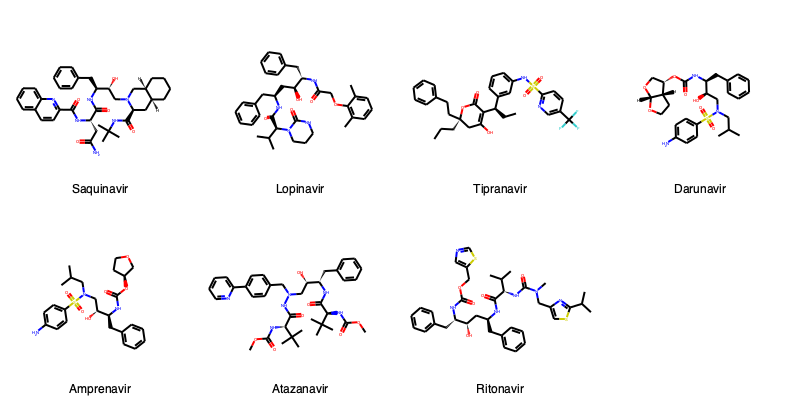

In [3]:
Draw.MolsToGridImage(df.Mol, legends=df.Name.to_list(), molsPerRow=4)

## Generate 3D coordinates

In [5]:
df['Mol3D']=df['Mol'].apply(generate_mol_3D)

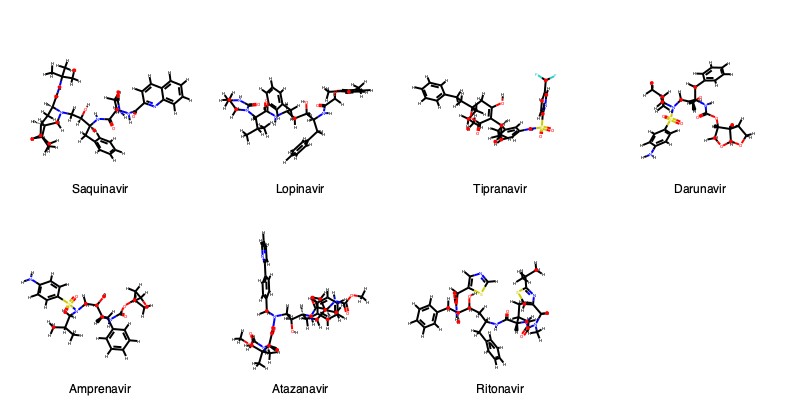

In [6]:
Draw.MolsToGridImage(df.Mol3D, legends=df.Name.to_list(), molsPerRow=4)

## Save output

In [7]:
w = Chem.SDWriter('../data/'+fname+'_3D.sdf')
for m in df.Mol3D: w.write(m)
w.close()